****
# Introduction 🥳
****

*Author - Samanyu*<br>
*Language - Python*<br>
*Accelerator - GPU T4 x2*<br>

**Goal: To predict listening time of a podcast episode**

****
# Reading and Displaying the Data 📖
****

In [1]:
# importing
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from category_encoders import TargetEncoder

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv(r'/kaggle/input/playground-series-s5e4/train.csv')
te=pd.read_csv(r'/kaggle/input/playground-series-s5e4/test.csv')
tte=te.copy()

In [3]:
df

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


In [4]:
te

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
249995,999995,Mind & Body,Episode 100,21.05,Health,65.77,Saturday,Evening,96.40,3.0,Negative
249996,999996,Joke Junction,Episode 85,85.50,Comedy,41.47,Saturday,Night,30.52,2.0,Negative
249997,999997,Joke Junction,Episode 63,12.11,Comedy,25.92,Thursday,Evening,73.69,1.0,Neutral
249998,999998,Market Masters,Episode 46,113.46,Business,43.47,Friday,Night,93.59,3.0,Positive


****
# Data Visualization 🎨
****


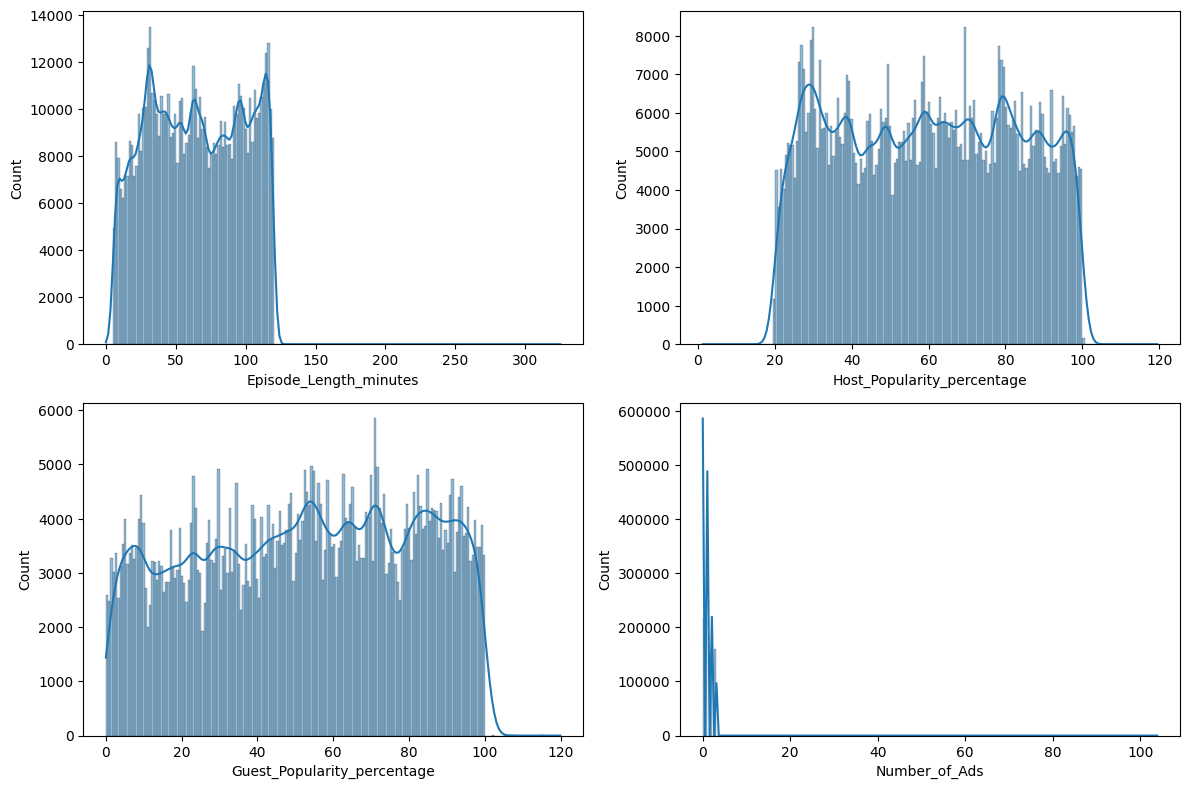

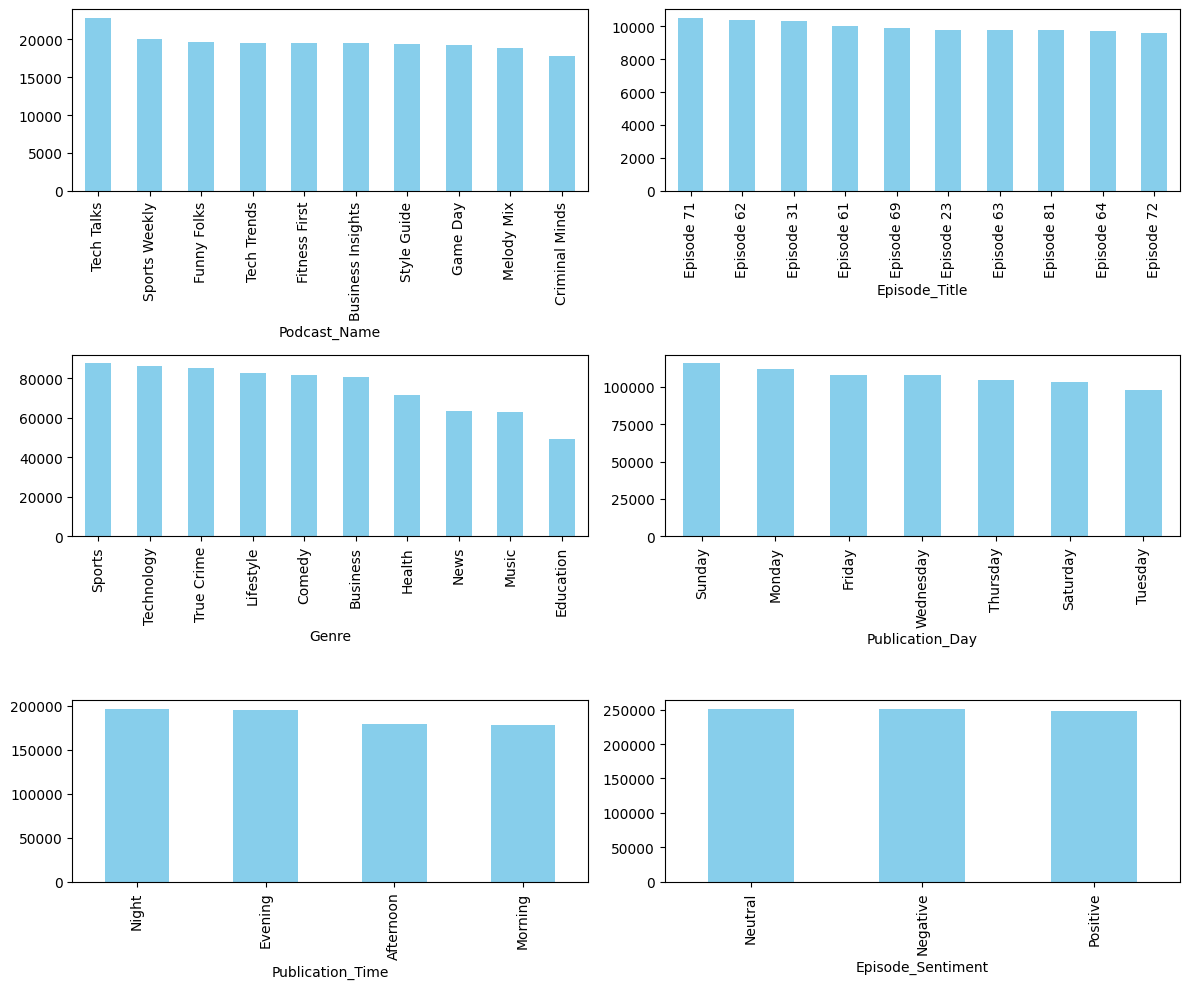

In [5]:
numerical_cols = ['Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage', 'Number_of_Ads']
categorical_cols = ['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col].dropna(), bins=200, kde=True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    df[col].value_counts().nlargest(10).plot(kind='bar', color='skyblue')
plt.tight_layout()
plt.show()


**Statistical Insights from the Histograms:**<br>
1. Episode Length (Minutes)
* Mean-centered distribution: Most episodes range between 30 to 100 minutes, with very few extreme values beyond 120 minutes, indicating a right-skewed distribution.
* Potential outliers: Some episodes exceed 300 minutes, which may be outliers affecting the central tendency.


2. Host Popularity Percentage
* Uniform-like distribution: The data appears evenly spread between 20% and 100%, suggesting a lack of central tendency and minimal skewness.
* Lower bound cutoff: Very few hosts have popularity below 20%, implying a possible truncation effect at the lower end.


3. Guest Popularity Percentage
* Bimodal trend: The distribution exhibits two density peaks, one around low popularity and another near higher popularity, suggesting a potential categorical segmentation of guests.
* Moderate spread: The values range widely from 0% to 100%, leading to a high standard deviation, indicating greater variability than host popularity.


4. Number of Ads

* Highly right-skewed: The majority of episodes contain few ads (0-5 ads), while a long tail suggests a small fraction of episodes have significantly more ads.
* Exponential-like decay: The rapid drop-off in frequency as the ad count increases suggests a Poisson-like distribution, where most values cluster near zero with occasional higher values.


**Statistical Insights from the Bar Charts:**<br>
1. Podcast Name Distribution
* Approximately uniform: The top 10 podcasts have nearly equal representation, indicating no strong dominance of a single podcast.
* Slight right skew: Some podcasts have marginally higher counts, meaning a few shows attract more episodes than others.


2. Episode Title Frequency
* Uniform distribution: The episode titles show minimal variance, meaning popular episodes have similar numbers of occurrences.
* No extreme outliers: No single episode title stands out as overwhelmingly dominant.


3. Genre Popularity
* Right-skewed distribution: Sports, Technology, and True Crime are the most frequent genres, while Education and Music have fewer episodes.
* Potential segmentation: Business, Health, and News genres have moderate representation, suggesting audience preferences may vary.


4. Publication Day Trends
* Slightly right-skewed: Sunday and Monday have the highest publication rates, while Tuesday and Saturday have the lowest.
* No drastic gaps: The distribution is fairly even across weekdays, implying no strong publication bias.


5. Publication Time Trends
* Evening and Night dominate: Episodes are mostly released in the evening and night, suggesting publishers target audiences after work hours.
* Afternoon and Morning are lower: This may indicate less engagement during working hours.


6. Episode Sentiment Analysis
* Balanced sentiment distribution: Neutral, Positive, and Negative sentiments are nearly equal, implying no overwhelming bias towards a particular sentiment.
* No extreme deviations: The dataset does not lean too much toward any single sentiment category, maintaining a diverse emotional tone.


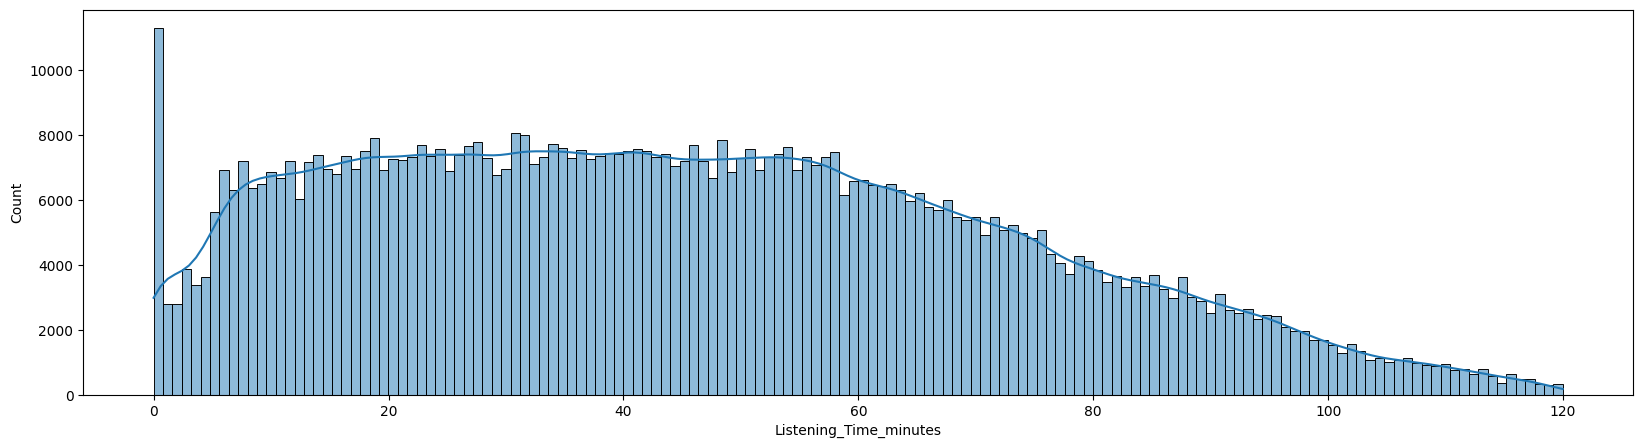

In [6]:
plt.figure(figsize=(20,5))
sns.histplot(df['Listening_Time_minutes'], bins=150, kde=True)
plt.show()

**Target Varaible**<br>

1. Right-Skewed Distribution – Most users have lower listening times, with a peak at 0 minutes and a long tail extending toward 120 minutes.
2. Central Tendency & Spread – The mode is at 0, the median is likely around 20-40 minutes, and the mean is higher due to the skew. The data spans from 0 to 120 minutes.
3. Outliers & Insights – The spike at 0 suggests a large number of inactive users, and the long tail indicates some heavy listeners. Consider log transformation for normalization.


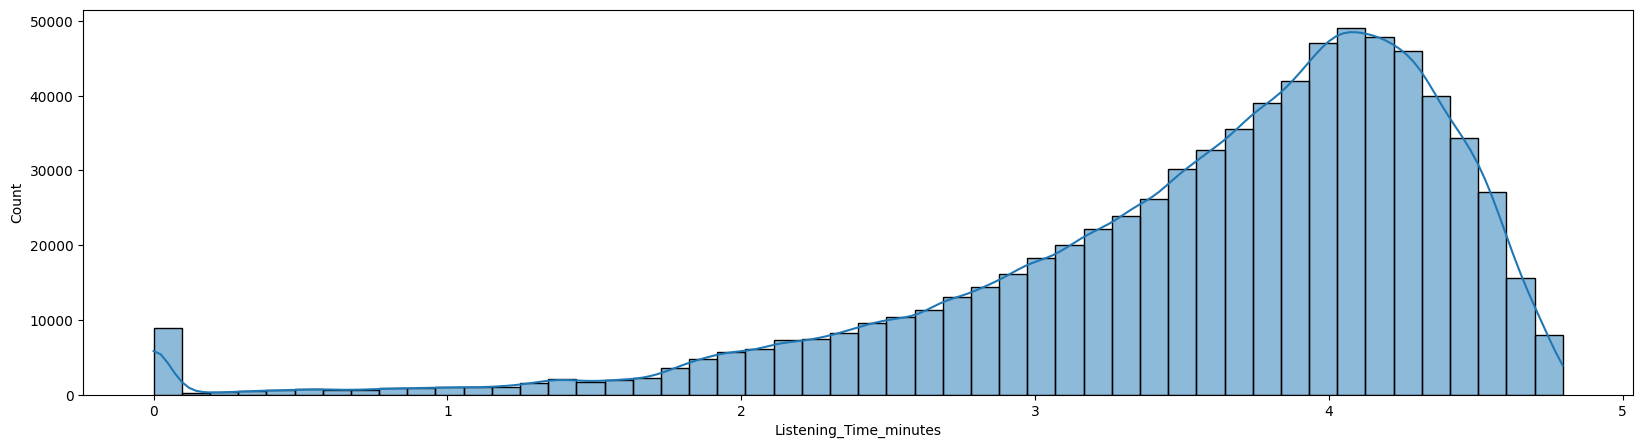

In [7]:
plt.figure(figsize=(20,5))
sns.histplot(np.log1p(df['Listening_Time_minutes']), bins=50, kde=True)
plt.show()

****
# Data Preprocessing ⚙️
****

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


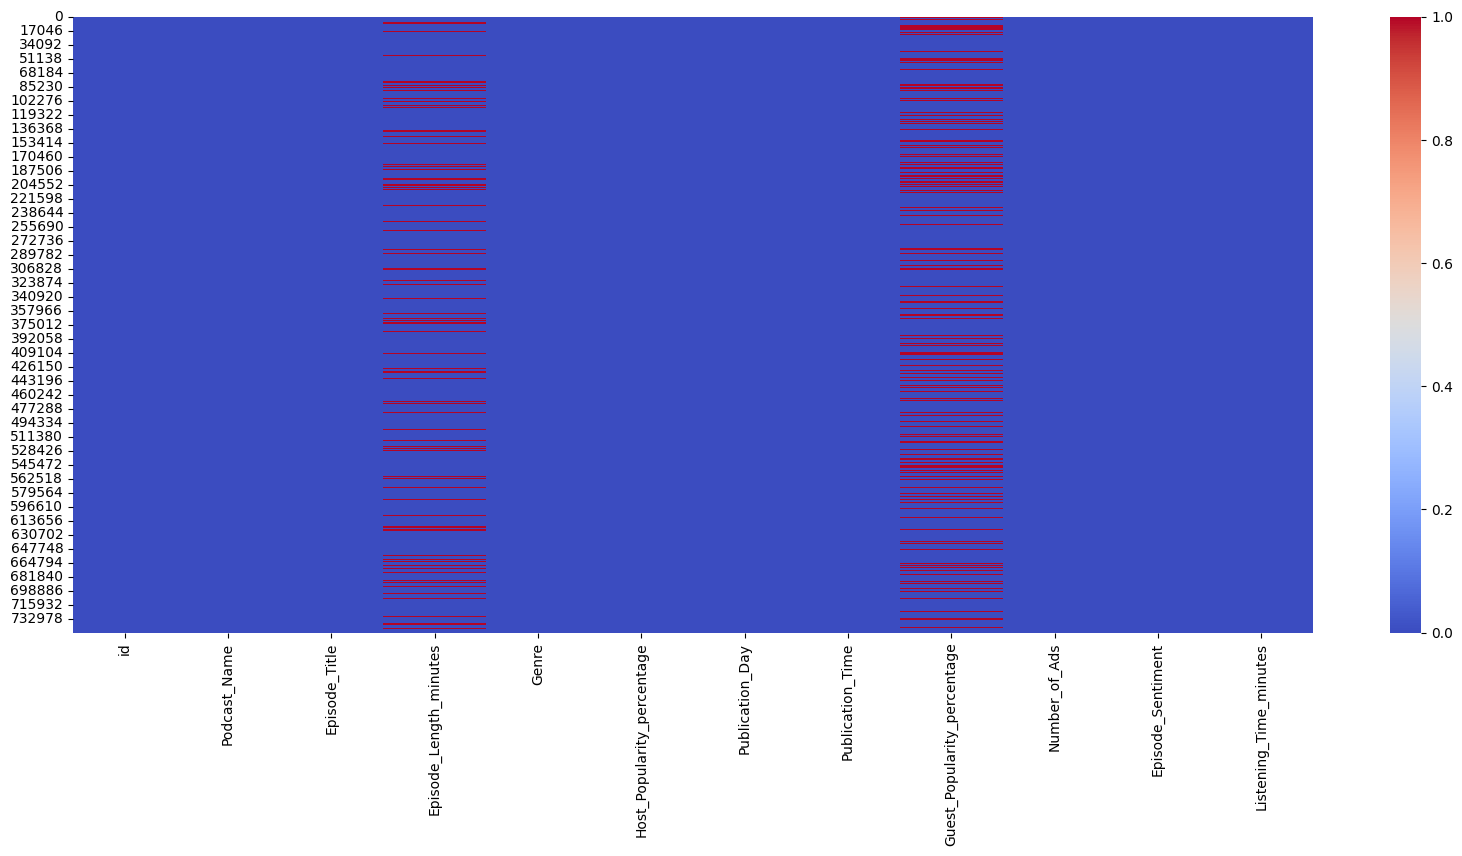

In [9]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.isnull(), cmap="coolwarm") 
plt.show()

In [10]:
df['Episode_Length_minutes']=df['Episode_Length_minutes'].fillna(df['Episode_Length_minutes'].median())
df['Guest_Popularity_percentage']=df['Guest_Popularity_percentage'].fillna(df['Guest_Popularity_percentage'].median())

df["Number_of_Ads"] = df["Number_of_Ads"].fillna(0).astype(int)
mode_value = df["Number_of_Ads"].mode()[0]  
df["Number_of_Ads"] = df["Number_of_Ads"].fillna(mode_value).astype(int)

In [11]:
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           250000 non-null  int64  
 1   Podcast_Name                 250000 non-null  object 
 2   Episode_Title                250000 non-null  object 
 3   Episode_Length_minutes       221264 non-null  float64
 4   Genre                        250000 non-null  object 
 5   Host_Popularity_percentage   250000 non-null  float64
 6   Publication_Day              250000 non-null  object 
 7   Publication_Time             250000 non-null  object 
 8   Guest_Popularity_percentage  201168 non-null  float64
 9   Number_of_Ads                250000 non-null  float64
 10  Episode_Sentiment            250000 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 21.0+ MB


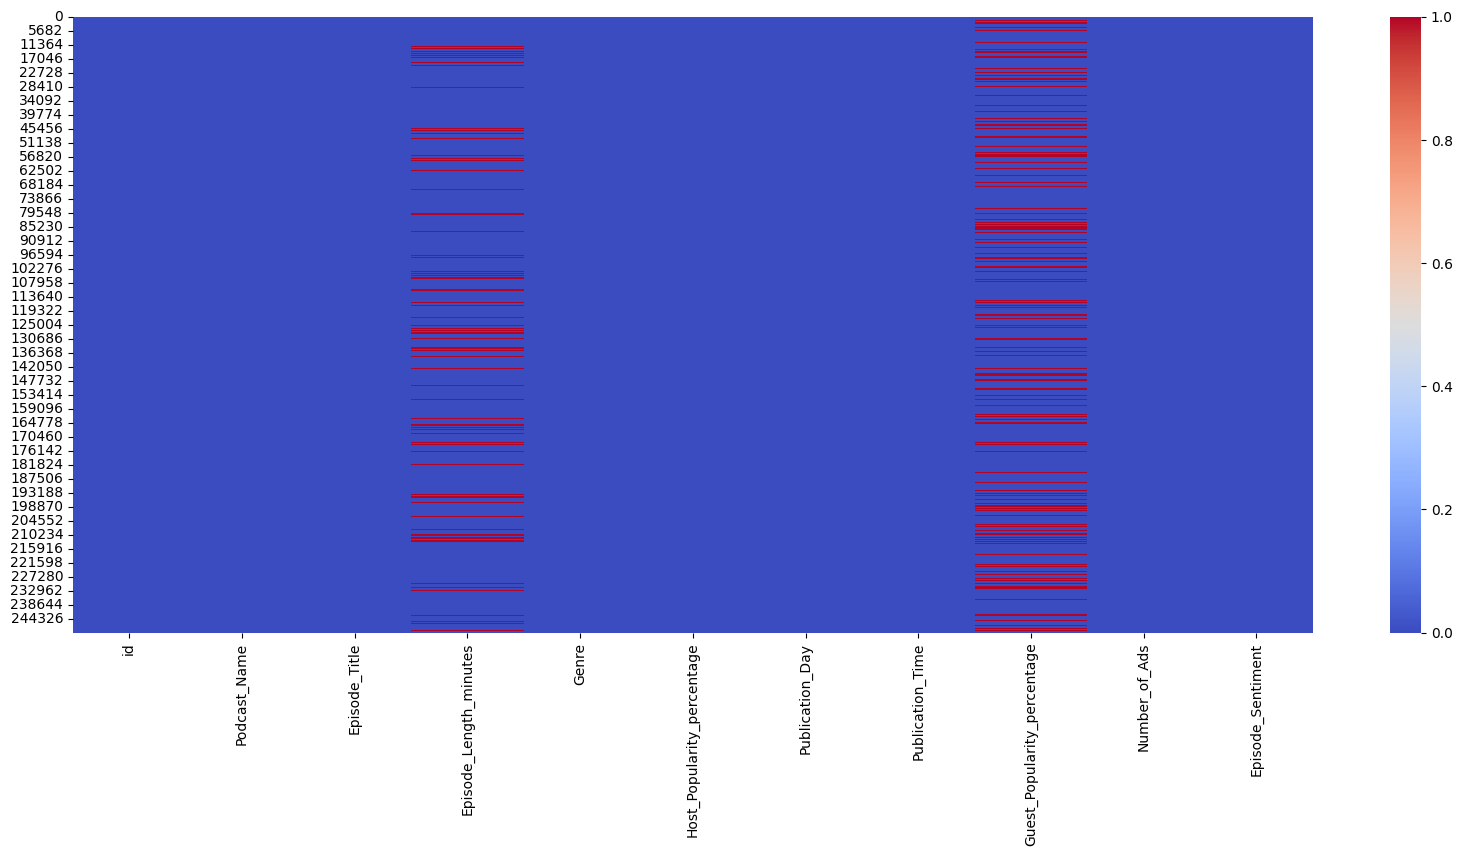

In [12]:
plt.figure(figsize=(20, 8))
sns.heatmap(te.isnull(), cmap="coolwarm") 
plt.show()

In [13]:
te['Episode_Length_minutes']=te['Episode_Length_minutes'].fillna(te['Episode_Length_minutes'].median())
te['Guest_Popularity_percentage']=te['Guest_Popularity_percentage'].fillna(te['Guest_Popularity_percentage'].median())

te["Number_of_Ads"] = te["Number_of_Ads"].fillna(0).astype(int)
mode_value = te["Number_of_Ads"].mode()[0]  
te["Number_of_Ads"] = te["Number_of_Ads"].fillna(mode_value).astype(int)

In [14]:
print(df.info(), te.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       750000 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  750000 non-null  float64
 9   Number_of_Ads                750000 non-null  int64  
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 68.7+ MB


****
# Feature Engineering 🧑‍🔬
****
*This bit is taken directly from @Ravi Ramakrishnan*

In [15]:
from itertools import combinations  
from joblib import Parallel, delayed

In [16]:
df["Weekday"] = df["Publication_Day"].map({
    "Sunday": 0, 
    "Monday": 1, 
    "Tuesday": 2, 
    "Wednesday": 3, 
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6,
})
df["SinWeekday"] = np.sin(2 * np.pi * df["Weekday"] / 7)
df["CosWeekday"] = np.cos(2 * np.pi * df["Weekday"] / 7)
df["Time"] = df["Publication_Time"].map({
    "Morning": 0, 
    "Afternoon": 1, 
    "Evening": 2, 
    "Night": 3, 
})
df["SinTime"] = np.sin(2 * np.pi * df["Time"] / 4)
df["CosTime"] = np.cos(2 * np.pi * df["Time"] / 4)
df["Episode_Title"] = df["Episode_Title"].str.split(" ", expand=True)[1].astype(np.uint16)
df["Number_of_Ads"] = df["Number_of_Ads"].fillna(0).clip(0, 3).astype(np.uint8)
df["Episode_Length_minutes"] = df['Episode_Length_minutes'].fillna(60)
df['SinEpLen'] = np.sin(2 * np.pi * df['Episode_Length_minutes'] / 60)
df['CosEpLen'] = np.cos(2 * np.pi * df['Episode_Length_minutes'] / 60)
del df["Publication_Time"], df["Publication_Day"]
df["ELen_Int"] = np.floor(df["Episode_Length_minutes"])
df["ELen_Dec"] = df["Episode_Length_minutes"] - df["ELen_Int"]
cat_cols = [
    "Podcast_Name", "Episode_Title", "Genre", "Number_of_Ads", 
    "Episode_Sentiment", "ELen_Int"
]
df[cat_cols] = df[cat_cols].astype("string")
for col1, col2 in combinations(cat_cols, 2):
    df[f"{col1}-{col2}"] = df[col1] + "-" + df[col2]

In [17]:
te["Weekday"] = te["Publication_Day"].map({
    "Sunday": 0, "Monday": 1, "Tuesday": 2, "Wednesday": 3,
    "Thursday": 4, "Friday": 5, "Saturday": 6
})
te["SinWeekday"] = np.sin(2 * np.pi * te["Weekday"] / 7)
te["CosWeekday"] = np.cos(2 * np.pi * te["Weekday"] / 7)
te["Time"] = te["Publication_Time"].map({
    "Morning": 0, "Afternoon": 1, "Evening": 2, "Night": 3
})
te["SinTime"] = np.sin(2 * np.pi * te["Time"] / 4)
te["CosTime"] = np.cos(2 * np.pi * te["Time"] / 4)
te["Episode_Title"] = te["Episode_Title"].str.split(" ", expand=True)[1].astype(np.uint16)
te["Number_of_Ads"] = te["Number_of_Ads"].fillna(0).clip(0, 3).astype(np.uint8)
te["Episode_Length_minutes"] = te['Episode_Length_minutes'].fillna(60)
te['SinEpLen'] = np.sin(2 * np.pi * te['Episode_Length_minutes'] / 60)
te['CosEpLen'] = np.cos(2 * np.pi * te['Episode_Length_minutes'] / 60)
del te["Publication_Time"], te["Publication_Day"]
te["ELen_Int"] = np.floor(te["Episode_Length_minutes"])
te["ELen_Dec"] = te["Episode_Length_minutes"] - te["ELen_Int"]
te[cat_cols] = te[cat_cols].astype("string").fillna("missing")
for col1, col2 in combinations(cat_cols, 2):
    te[f"{col1}-{col2}"] = te[col1] + "-" + te[col2]

In [18]:
print(df.info(), te.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 35 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   id                               750000 non-null  int64  
 1   Podcast_Name                     750000 non-null  string 
 2   Episode_Title                    750000 non-null  string 
 3   Episode_Length_minutes           750000 non-null  float64
 4   Genre                            750000 non-null  string 
 5   Host_Popularity_percentage       750000 non-null  float64
 6   Guest_Popularity_percentage      750000 non-null  float64
 7   Number_of_Ads                    750000 non-null  string 
 8   Episode_Sentiment                750000 non-null  string 
 9   Listening_Time_minutes           750000 non-null  float64
 10  Weekday                          750000 non-null  int64  
 11  SinWeekday                       750000 non-null  float64
 12  Co

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

train = df
test = te
string_cols = [col for col in train.columns if train[col].dtype == 'string']
encoders = {}

for col in string_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))
    encoders[col] = le
for col in string_cols:
    if col in test.columns:
        le = encoders[col]
        test[col] = test[col].astype(str).map(
            lambda x: x if x in le.classes_ else '-1'
        ).map(
            {val: idx for idx, val in enumerate(np.append(le.classes_, '-1'))}
        ).astype(int)

In [20]:
df=train.copy()
te=test.copy()

****
# Model 🪄
****

In [21]:
import pandas as pd
import numpy as np
import optuna
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split

try:
    import cudf
except ImportError:
    cudf = None

try:
    from optuna.integration import XGBoostPruningCallback, LightGBMPruningCallback
    has_optuna_integration = True
except ImportError:
    has_optuna_integration = False
    print("Warning: optuna-integration not found. Running without pruning callbacks.")
    print("Install with: pip install optuna-integration[xgboost,lightgbm]")

def preprocess_data(df, te, target_col='Listening_Time_minutes', use_gpu=True):
    df_local = cudf.from_pandas(df) if use_gpu and cudf else df
    te_local = cudf.from_pandas(te) if use_gpu and cudf else te
    quantiles = df_local[target_col].quantile([0.25, 0.75])
    if cudf and use_gpu:
        quantiles = quantiles.to_pandas().tolist()
        Q1, Q3 = quantiles[0], quantiles[1]
    else:
        Q1, Q3 = quantiles
    IQR = Q3 - Q1
    bounds = (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
    if cudf and use_gpu:
        mask = df_local[target_col].between(left=bounds[0], right=bounds[1])
    else:
        mask = df_local[target_col].between(*bounds)
    X = df_local.loc[mask].drop(columns=target_col).astype('float32')
    y = df_local.loc[mask, target_col].astype('float32')
    X_test = te_local[X.columns].astype('float32')
    X_median = X.median()
    X_test = X_test.fillna(X_median)
    if use_gpu and cudf:
        X, y, X_test = X.to_pandas(), y.to_pandas(), X_test.to_pandas()
    print(f"Rows after outlier removal: {X.shape[0]} (original: {df.shape[0]})")
    return X, y, X_test

def xgb_objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'tree_method': 'hist',
        'gpu_id': 0 if cudf else -1,
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 10, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 10, log=True),
        'random_state': 42,
        'n_jobs': -1,
    }
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)
    dtrain = xgb.DMatrix(X_train, y_train, nthread=-1)
    dval = xgb.DMatrix(X_val, y_val, nthread=-1)
    callbacks = [XGBoostPruningCallback(trial, 'val-rmse')] if has_optuna_integration else None
    model = xgb.train(params, dtrain, num_boost_round=1000,
                      evals=[(dval, 'val')], early_stopping_rounds=50,
                      verbose_eval=False, callbacks=callbacks)
    pred_val = model.predict(dval)
    mse = np.mean((y_val - pred_val) ** 2)
    return mse

def lgb_objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'mse',
        'boosting_type': 'gbdt',
        'device': 'gpu' if cudf else 'cpu',
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'num_leaves': trial.suggest_int('num_leaves', 31, 128),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 10, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 10, log=True),
        'random_state': 42,
        'n_jobs': -1,
    }
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)
    dtrain = lgb.Dataset(X_train, label=y_train)
    dval = lgb.Dataset(X_val, label=y_val, reference=dtrain)
    callbacks = [LightGBMPruningCallback(trial, 'mse')] if has_optuna_integration else None
    model = lgb.train(params, dtrain, num_boost_round=1000,
                      valid_sets=[dval], callbacks=callbacks)
    pred_val = model.predict(X_val)
    mse = np.mean((y_val - pred_val) ** 2)
    return mse

X, y, X_test = preprocess_data(df, te)

study_xgb = optuna.create_study(direction='minimize', 
                                pruner=optuna.pruners.MedianPruner() if has_optuna_integration else None)
study_xgb.optimize(xgb_objective, n_trials=30, timeout=1800)
best_params_xgb = study_xgb.best_params
best_params_xgb.update({
    'objective': 'reg:squarederror',
    'tree_method': 'hist',
    'gpu_id': 0 if cudf else -1,
    'random_state': 42,
    'n_jobs': -1
})
print("Best XGBoost Params:", best_params_xgb)

study_lgb = optuna.create_study(direction='minimize', 
                                pruner=optuna.pruners.MedianPruner() if has_optuna_integration else None)
study_lgb.optimize(lgb_objective, n_trials=30, timeout=1800)
best_params_lgb = study_lgb.best_params
best_params_lgb.update({
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'device': 'gpu' if cudf else 'cpu',
    'random_state': 42,
    'n_jobs': -1
})
print("Best LightGBM Params:", best_params_lgb)

Install with: pip install optuna-integration[xgboost,lightgbm]


[I 2025-04-02 05:59:04,411] A new study created in memory with name: no-name-2df2a5f1-4aaa-45b4-8dab-63f8e661f258


Rows after outlier removal: 750000 (original: 750000)


[I 2025-04-02 05:59:12,635] Trial 0 finished with value: 169.93289184570312 and parameters: {'learning_rate': 0.07474482223835896, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.8384660804165877, 'colsample_bytree': 0.8300817315303348, 'reg_alpha': 0.13868254773624195, 'reg_lambda': 0.002073918613696549}. Best is trial 0 with value: 169.93289184570312.
[I 2025-04-02 05:59:21,276] Trial 1 finished with value: 168.08834838867188 and parameters: {'learning_rate': 0.10679493594473609, 'max_depth': 4, 'min_child_weight': 9, 'subsample': 0.79810096170137, 'colsample_bytree': 0.9314775647068542, 'reg_alpha': 1.0902362345629665e-05, 'reg_lambda': 0.0011793140061454191}. Best is trial 1 with value: 168.08834838867188.
[I 2025-04-02 05:59:46,895] Trial 2 finished with value: 167.19204711914062 and parameters: {'learning_rate': 0.0069571264407290705, 'max_depth': 9, 'min_child_weight': 3, 'subsample': 0.9460646110689249, 'colsample_bytree': 0.8731070603889819, 'reg_alpha': 0.00882269952399

Best XGBoost Params: {'learning_rate': 0.05457110549205773, 'max_depth': 10, 'min_child_weight': 8, 'subsample': 0.9871027952298355, 'colsample_bytree': 0.8690560636982934, 'reg_alpha': 0.41821538162202176, 'reg_lambda': 2.7452342398404257, 'objective': 'reg:squarederror', 'tree_method': 'hist', 'gpu_id': 0, 'random_state': 42, 'n_jobs': -1}
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.024616 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

[I 2025-04-02 06:09:12,774] Trial 0 finished with value: 164.46273311759637 and parameters: {'learning_rate': 0.11260840521378318, 'max_depth': 9, 'min_child_weight': 8, 'num_leaves': 105, 'subsample': 0.9359424621676539, 'colsample_bytree': 0.7189178821641438, 'reg_alpha': 0.0002150916667873561, 'reg_lambda': 1.1273922331754881e-05}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.023056 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427


[I 2025-04-02 06:09:36,518] Trial 1 finished with value: 165.25683455420557 and parameters: {'learning_rate': 0.0929382495548728, 'max_depth': 9, 'min_child_weight': 3, 'num_leaves': 71, 'subsample': 0.81615285675568, 'colsample_bytree': 0.771363792215833, 'reg_alpha': 3.104031462144257, 'reg_lambda': 3.314357727656099}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.022771 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-04-02 06:09:50,729] Trial 2 finished with value: 170.80057334896986 and parameters: {'learning_rate': 0.04451988394623438, 'max_depth': 3, 'min_child_weight': 3, 'num_leaves': 74, 'subsample': 0.8552486789688594, 'colsample_bytree': 0.8339193312719798, 'reg_alpha': 0.00039037185726090184, 'reg_lambda': 0.02068301628515031}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.022887 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-04-02 06:10:09,059] Trial 3 finished with value: 167.13071563171397 and parameters: {'learning_rate': 0.2444490280790447, 'max_depth': 4, 'min_child_weight': 8, 'num_leaves': 47, 'subsample': 0.9820537393804143, 'colsample_bytree': 0.9040255522142981, 'reg_alpha': 0.00042802687650858227, 'reg_lambda': 0.0046257844498479965}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.023015 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427


[I 2025-04-02 06:10:36,965] Trial 4 finished with value: 166.41571461934086 and parameters: {'learning_rate': 0.03994686221784073, 'max_depth': 9, 'min_child_weight': 4, 'num_leaves': 82, 'subsample': 0.8408426306842731, 'colsample_bytree': 0.8332449523731057, 'reg_alpha': 0.21939026389242983, 'reg_lambda': 0.002461314745873882}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.022944 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-04-02 06:11:11,409] Trial 5 finished with value: 165.1994210924909 and parameters: {'learning_rate': 0.0784413893273186, 'max_depth': 7, 'min_child_weight': 9, 'num_leaves': 110, 'subsample': 0.9859316527433308, 'colsample_bytree': 0.9240459885008352, 'reg_alpha': 0.14732005301564277, 'reg_lambda': 4.237783275158144}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.022276 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-04-02 06:11:28,276] Trial 6 finished with value: 167.95605981070182 and parameters: {'learning_rate': 0.10937713899647789, 'max_depth': 4, 'min_child_weight': 4, 'num_leaves': 58, 'subsample': 0.910461798603636, 'colsample_bytree': 0.9174301354664782, 'reg_alpha': 1.065075014093354, 'reg_lambda': 0.09111184890045244}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.022772 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427


[I 2025-04-02 06:11:51,954] Trial 7 finished with value: 166.3716042062459 and parameters: {'learning_rate': 0.20585755638634087, 'max_depth': 9, 'min_child_weight': 5, 'num_leaves': 84, 'subsample': 0.8985671933120127, 'colsample_bytree': 0.8273988824200539, 'reg_alpha': 1.3136344724995937e-05, 'reg_lambda': 9.722389659675879e-05}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.022901 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-04-02 06:12:08,663] Trial 8 finished with value: 172.03345439604263 and parameters: {'learning_rate': 0.014681090269529936, 'max_depth': 3, 'min_child_weight': 1, 'num_leaves': 116, 'subsample': 0.7385355899958749, 'colsample_bytree': 0.8878099728627357, 'reg_alpha': 0.5677304883621825, 'reg_lambda': 0.00016863506865281899}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.022210 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-04-02 06:12:29,583] Trial 9 finished with value: 171.87730889637476 and parameters: {'learning_rate': 0.008243554418186359, 'max_depth': 4, 'min_child_weight': 2, 'num_leaves': 97, 'subsample': 0.852097134467124, 'colsample_bytree': 0.7581654987435077, 'reg_alpha': 0.351381324476619, 'reg_lambda': 4.8872614388146175e-05}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.024148 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-04-02 06:13:06,379] Trial 10 finished with value: 167.1488118226652 and parameters: {'learning_rate': 0.02527075143958993, 'max_depth': 7, 'min_child_weight': 7, 'num_leaves': 124, 'subsample': 0.7052490032068837, 'colsample_bytree': 0.7046908483096817, 'reg_alpha': 0.003668598110116571, 'reg_lambda': 0.0005541048546960682}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.022719 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-04-02 06:13:40,313] Trial 11 finished with value: 164.89206482421034 and parameters: {'learning_rate': 0.08987699930456079, 'max_depth': 7, 'min_child_weight': 10, 'num_leaves': 106, 'subsample': 0.9995096136677428, 'colsample_bytree': 0.941450690296382, 'reg_alpha': 0.02256448742733111, 'reg_lambda': 3.9125369757980635}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.022362 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427


[I 2025-04-02 06:14:05,659] Trial 12 finished with value: 164.88286132326814 and parameters: {'learning_rate': 0.12317741727828263, 'max_depth': 10, 'min_child_weight': 10, 'num_leaves': 100, 'subsample': 0.9372225237616018, 'colsample_bytree': 0.9925522380947513, 'reg_alpha': 0.014554090332259573, 'reg_lambda': 0.35655325583958164}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.022298 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427


[I 2025-04-02 06:14:31,272] Trial 13 finished with value: 165.4815222710427 and parameters: {'learning_rate': 0.1523655574083308, 'max_depth': 10, 'min_child_weight': 7, 'num_leaves': 95, 'subsample': 0.9317953886502796, 'colsample_bytree': 0.9707462911213973, 'reg_alpha': 1.078926076130461e-05, 'reg_lambda': 0.2202835714762511}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.023076 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-04-02 06:14:59,175] Trial 14 finished with value: 169.5302063612117 and parameters: {'learning_rate': 0.2969510038417782, 'max_depth': 8, 'min_child_weight': 10, 'num_leaves': 98, 'subsample': 0.9363495754671576, 'colsample_bytree': 0.9931996202274739, 'reg_alpha': 0.0011618951839730076, 'reg_lambda': 1.0492236854576507e-05}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.023110 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-04-02 06:15:29,895] Trial 15 finished with value: 164.8468449230304 and parameters: {'learning_rate': 0.06046423806133573, 'max_depth': 10, 'min_child_weight': 8, 'num_leaves': 123, 'subsample': 0.9518242069808167, 'colsample_bytree': 0.7049119229821738, 'reg_alpha': 8.829642392907606e-05, 'reg_lambda': 0.24932280476004248}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.022101 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-04-02 06:16:01,418] Trial 16 finished with value: 164.77647047693299 and parameters: {'learning_rate': 0.05749247921744104, 'max_depth': 10, 'min_child_weight': 7, 'num_leaves': 127, 'subsample': 0.8861842460255315, 'colsample_bytree': 0.7078971453771051, 'reg_alpha': 5.442640084042425e-05, 'reg_lambda': 0.05707875949184884}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.022430 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-04-02 06:16:31,653] Trial 17 finished with value: 168.4704274944422 and parameters: {'learning_rate': 0.02270320947721722, 'max_depth': 6, 'min_child_weight': 6, 'num_leaves': 127, 'subsample': 0.7948399903981826, 'colsample_bytree': 0.7519012680826384, 'reg_alpha': 7.06841868705792e-05, 'reg_lambda': 0.026714346565587743}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.023123 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-04-02 06:17:05,193] Trial 18 finished with value: 165.1873345670083 and parameters: {'learning_rate': 0.0547395951685185, 'max_depth': 8, 'min_child_weight': 6, 'num_leaves': 116, 'subsample': 0.8877712447472562, 'colsample_bytree': 0.7932893065232074, 'reg_alpha': 7.321409437488176e-05, 'reg_lambda': 0.0008302057837220848}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.023181 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427


[I 2025-04-02 06:17:27,521] Trial 19 finished with value: 168.9390995826455 and parameters: {'learning_rate': 0.027663134683210255, 'max_depth': 6, 'min_child_weight': 8, 'num_leaves': 33, 'subsample': 0.8752906030015546, 'colsample_bytree': 0.7291067945057429, 'reg_alpha': 0.0028867941056800743, 'reg_lambda': 1.4719853909643411e-05}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.022854 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-04-02 06:17:52,314] Trial 20 finished with value: 164.87939157582963 and parameters: {'learning_rate': 0.16566086778597175, 'max_depth': 8, 'min_child_weight': 7, 'num_leaves': 90, 'subsample': 0.7863214041049144, 'colsample_bytree': 0.7842855263907441, 'reg_alpha': 0.00021835219479791475, 'reg_lambda': 0.8935269298881021}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.022981 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427


[I 2025-04-02 06:18:22,987] Trial 21 finished with value: 164.85835266679445 and parameters: {'learning_rate': 0.05947951556096917, 'max_depth': 10, 'min_child_weight': 8, 'num_leaves': 120, 'subsample': 0.9637298303415828, 'colsample_bytree': 0.7047663067425124, 'reg_alpha': 5.232348444166072e-05, 'reg_lambda': 0.05789506065193565}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.022447 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427


[I 2025-04-02 06:18:54,365] Trial 22 finished with value: 164.59596618425059 and parameters: {'learning_rate': 0.062371104345748496, 'max_depth': 10, 'min_child_weight': 9, 'num_leaves': 126, 'subsample': 0.9589430691955907, 'colsample_bytree': 0.7319245091958336, 'reg_alpha': 2.9537650289333936e-05, 'reg_lambda': 0.69329524328786}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.022330 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-04-02 06:19:26,979] Trial 23 finished with value: 166.01356388446675 and parameters: {'learning_rate': 0.033371021624846064, 'max_depth': 9, 'min_child_weight': 9, 'num_leaves': 110, 'subsample': 0.9103589037472402, 'colsample_bytree': 0.735791715721954, 'reg_alpha': 2.1633808848461924e-05, 'reg_lambda': 0.7774796841264314}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.022707 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427


[I 2025-04-02 06:20:03,857] Trial 24 finished with value: 167.32496444806245 and parameters: {'learning_rate': 0.01764402020735221, 'max_depth': 10, 'min_child_weight': 9, 'num_leaves': 108, 'subsample': 0.9644642633286841, 'colsample_bytree': 0.8005818680738095, 'reg_alpha': 0.00019620822154297802, 'reg_lambda': 0.00758818808072475}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.049971 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-04-02 06:20:35,184] Trial 25 finished with value: 164.52817700427866 and parameters: {'learning_rate': 0.07160263438342379, 'max_depth': 9, 'min_child_weight': 7, 'num_leaves': 127, 'subsample': 0.9164476205880238, 'colsample_bytree': 0.7418230235380275, 'reg_alpha': 0.0007750328514278192, 'reg_lambda': 1.0792769274563763}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.060952 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2025-04-02 06:21:06,310] Trial 26 finished with value: 164.65514780392695 and parameters: {'learning_rate': 0.14001761672788018, 'max_depth': 8, 'min_child_weight': 9, 'num_leaves': 115, 'subsample': 0.9194881604690677, 'colsample_bytree': 0.7356787542450828, 'reg_alpha': 0.001876371581182471, 'reg_lambda': 1.433999222831219}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.022721 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-04-02 06:21:35,223] Trial 27 finished with value: 165.01503490166837 and parameters: {'learning_rate': 0.07420108040485375, 'max_depth': 9, 'min_child_weight': 6, 'num_leaves': 104, 'subsample': 0.9556560044168759, 'colsample_bytree': 0.8768188801346891, 'reg_alpha': 0.0007935902977298432, 'reg_lambda': 1.889156174280277}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.022773 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427


[I 2025-04-02 06:22:24,210] Trial 28 finished with value: 168.6846517325122 and parameters: {'learning_rate': 0.007583756138594676, 'max_depth': 9, 'min_child_weight': 5, 'num_leaves': 115, 'subsample': 0.8720306926292758, 'colsample_bytree': 0.7569201152140145, 'reg_alpha': 0.037104392818294106, 'reg_lambda': 8.205427560930412}. Best is trial 0 with value: 164.46273311759637.


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 637500, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (21.89 MB) transferred to GPU in 0.023421 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.457427


[I 2025-04-02 06:22:45,804] Trial 29 finished with value: 165.64924162533092 and parameters: {'learning_rate': 0.09536442934021482, 'max_depth': 9, 'min_child_weight': 8, 'num_leaves': 67, 'subsample': 0.9778999856792335, 'colsample_bytree': 0.7751428296340668, 'reg_alpha': 0.004076110899882904, 'reg_lambda': 0.0014972974426949507}. Best is trial 0 with value: 164.46273311759637.


Best LightGBM Params: {'learning_rate': 0.11260840521378318, 'max_depth': 9, 'min_child_weight': 8, 'num_leaves': 105, 'subsample': 0.9359424621676539, 'colsample_bytree': 0.7189178821641438, 'reg_alpha': 0.0002150916667873561, 'reg_lambda': 1.1273922331754881e-05, 'objective': 'regression', 'metric': 'mse', 'boosting_type': 'gbdt', 'device': 'gpu', 'random_state': 42, 'n_jobs': -1}


****
# Prediction 🔮
****

In [22]:
dtrain_xgb = xgb.DMatrix(X, y, nthread=-1)
dtest_xgb = xgb.DMatrix(X_test, nthread=-1)
model_xgb = xgb.train(best_params_xgb, dtrain_xgb, num_boost_round=500)

dtrain_lgb = lgb.Dataset(X, label=y)
model_lgb = lgb.train(best_params_lgb, dtrain_lgb, num_boost_round=500)

# Predictions
pred_xgb = model_xgb.predict(dtest_xgb)
pred_lgb = model_lgb.predict(X_test)

weights = [0.5, 0.5] 
pred_final = weights[0] * pred_xgb + weights[1] * pred_lgb

pred_final = np.where(np.isfinite(pred_final), pred_final, y.median())
pred_final = np.clip(pred_final, 0, 120)
#pred_final = np.clip(pred_final, 0, None)


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4982
[LightGBM] [Info] Number of data points in the train set: 750000, number of used features: 34
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 34 dense feature groups (25.75 MB) transferred to GPU in 0.027061 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.437406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


****
# Submission 🧪
****

In [23]:
submission = pd.DataFrame({'id': te['id'].values, 'Listening_Time_minutes': pred_final})
submission.to_csv('submission.csv', index=False)
print("Submission generated. Shape:", submission.shape)


del dtrain_xgb, dtest_xgb, model_xgb, dtrain_lgb, model_lgb, X, y, X_test
import gc
gc.collect()

Submission generated. Shape: (250000, 2)


22

****
# Feedback and Suggestions
****

**This is the First version of this notebook, better content and preprocessing to come soon**<br>
**If you liked this notebook or if you found this helpful kindly upvote and provide feedback**<br>
**Any mistakes or blunders please do tell as I am simply a beginner**<br>